🎯 A* Search with Manhattan Distance
✅ Path Found!
📏 Path Length: 12 steps
💰 Total Cost: 11
🔍 Nodes Visited: 15
🛤️  Path: (1, 1) → (1, 2) → (2, 2) → (3, 2) → (3, 1) → (4, 1) → (5, 1) → (5, 2) → (5, 3) → (5, 4) → (5, 5) → (5, 6)


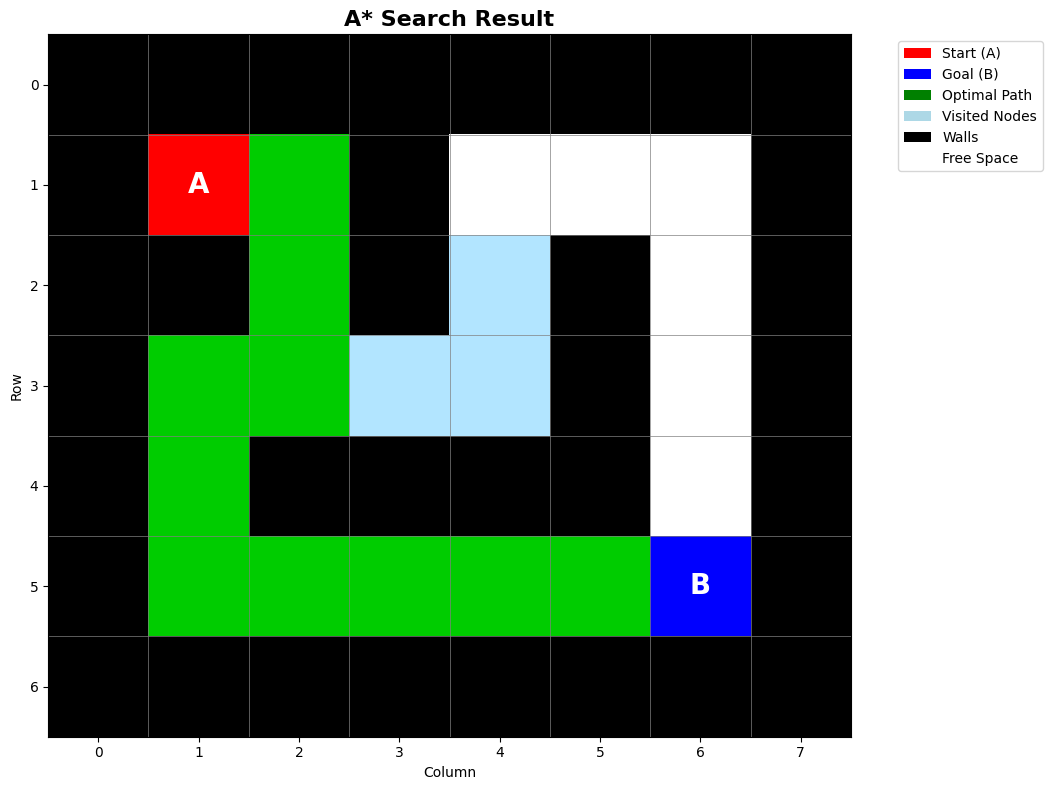


🧮 Heuristic Properties:
   ✅ Admissible: YES
   ✅ Consistent: YES
   🏆 Guarantees: Optimal Path


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

def find_start_goal(maze):
    """Find start 'A' and goal 'B' positions in the maze"""
    start = goal = None
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 'A':
                start = (i, j)
            elif maze[i][j] == 'B':
                goal = (i, j)
    return start, goal

def manhattan_distance(pos1, pos2):
    """Manhattan distance heuristic: |x1-x2| + |y1-y2|"""
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def get_neighbors(pos, maze):
    """Get valid neighboring positions (up, down, left, right)"""
    row, col = pos
    neighbors = []
    rows, cols = len(maze), len(maze[0])
    
    # 4 directions: up, down, left, right
    for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
        new_row, new_col = row + dr, col + dc
        
        # Check bounds and not a wall
        if (0 <= new_row < rows and 0 <= new_col < cols and 
            maze[new_row][new_col] != 1):
            neighbors.append((new_row, new_col))
    
    return neighbors

def reconstruct_path(came_from, current):
    """Build the path from start to goal"""
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

def a_star_search(maze):
    """A* search algorithm"""
    start, goal = find_start_goal(maze)
    if not start or not goal:
        return None, [], []
    
    # Priority queue: (f_score, g_score, position)
    open_set = [(0, 0, start)]
    came_from = {}
    g_score = {start: 0}
    visited_order = []
    
    while open_set:
        current_f, current_g, current = heapq.heappop(open_set)
        
        # Skip if already processed
        if current in visited_order:
            continue
            
        visited_order.append(current)
        
        # Goal reached!
        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, visited_order, g_score[current]
        
        # Explore neighbors
        for neighbor in get_neighbors(current, maze):
            if neighbor in visited_order:
                continue
                
            tentative_g = g_score[current] + 1  # Each step costs 1
            
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                # Better path found
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + manhattan_distance(neighbor, goal)
                heapq.heappush(open_set, (f_score, tentative_g, neighbor))
    
    return None, visited_order, float('inf')

def visualize_path(maze, path=None, visited=None):
    """Visualize the maze with path and visited nodes"""
    rows, cols = len(maze), len(maze[0])
    
    # Create color matrix
    colors = np.ones((rows, cols, 3))  # Start with white
    
    # Color the maze
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 1:  # Wall
                colors[i,j] = [0, 0, 0]  # Black
            elif maze[i][j] == 'A':  # Start
                colors[i,j] = [1, 0, 0]  # Red
            elif maze[i][j] == 'B':  # Goal
                colors[i,j] = [0, 0, 1]  # Blue
    
    # Color visited nodes (light blue)
    if visited:
        for pos in visited:
            if maze[pos[0]][pos[1]] not in ['A', 'B']:
                colors[pos[0], pos[1]] = [0.7, 0.9, 1.0]
    
    # Color path (green)
    if path:
        for pos in path:
            if maze[pos[0]][pos[1]] not in ['A', 'B']:
                colors[pos[0], pos[1]] = [0, 0.8, 0]
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.imshow(colors)
    plt.title('A* Search Result', fontsize=16, fontweight='bold')
    
    # Add grid
    for i in range(rows + 1):
        plt.axhline(y=i-0.5, color='gray', linewidth=0.5)
    for j in range(cols + 1):
        plt.axvline(x=j-0.5, color='gray', linewidth=0.5)
    
    # Add A and B labels
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 'A':
                plt.text(j, i, 'A', ha='center', va='center', 
                        fontsize=20, fontweight='bold', color='white')
            elif maze[i][j] == 'B':
                plt.text(j, i, 'B', ha='center', va='center', 
                        fontsize=20, fontweight='bold', color='white')
    
    # Add labels
    plt.xlabel('Column')
    plt.ylabel('Row')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='Start (A)'),
        Patch(facecolor='blue', label='Goal (B)'),
        Patch(facecolor='green', label='Optimal Path'),
        Patch(facecolor='lightblue', label='Visited Nodes'),
        Patch(facecolor='black', label='Walls'),
        Patch(facecolor='white', label='Free Space')
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example maze
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 'A', 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 'B', 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

print("🎯 A* Search with Manhattan Distance")
print("="*40)

# Run A* search
path, visited, cost = a_star_search(maze)

if path:
    print(f"✅ Path Found!")
    print(f"📏 Path Length: {len(path)} steps")
    print(f"💰 Total Cost: {cost}")
    print(f"🔍 Nodes Visited: {len(visited)}")
    print(f"🛤️  Path: {' → '.join(map(str, path))}")
    
    # Visualize the result
    visualize_path(maze, path, visited)
    
    print(f"\n🧮 Heuristic Properties:")
    print(f"   ✅ Admissible: YES")
    print(f"   ✅ Consistent: YES")
    print(f"   🏆 Guarantees: Optimal Path")
    
else:
    print("❌ No path found!")
    visualize_path(maze, None, visited)


CASE 1: Manhattan Distance × 1.5
🧮 Testing Admissibility:
   Violation at (4, 6): h=1.5 > true_dist=1
   Violation at (5, 5): h=1.5 > true_dist=1
   Violation at (3, 6): h=3.0 > true_dist=2
   Result: NOT ADMISSIBLE

📊 Case 1 Results:
   ✅ Path Found: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
   💰 Cost: 11
   📏 Path Length: 12 steps
   🔍 Nodes Visited: 15
   🏆 Optimal: YES


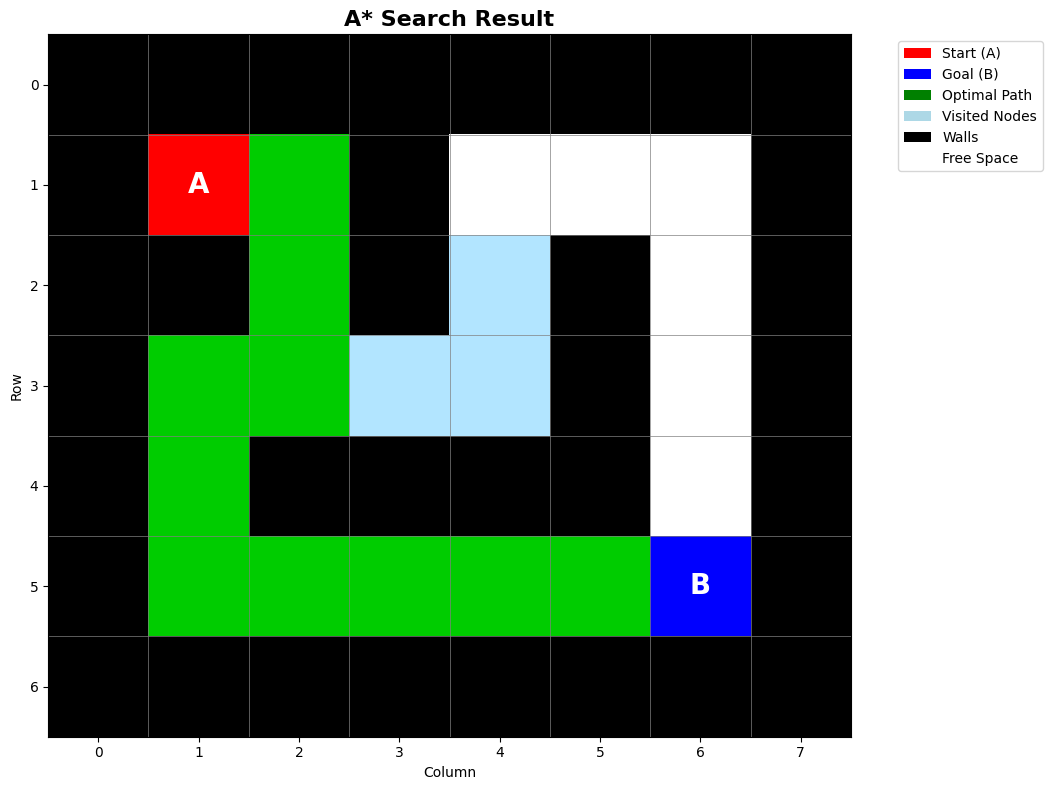


CASE 2: Inconsistent Heuristic
🧮 Testing Admissibility:
   Violation at (3, 1): h=10.0 > true_dist=7
   Result: NOT ADMISSIBLE

📊 Case 2 Results:
   ✅ Path Found: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]
   💰 Cost: 13
   📏 Path Length: 14 steps
   🔍 Nodes Visited: 14
   🏆 Optimal: NO


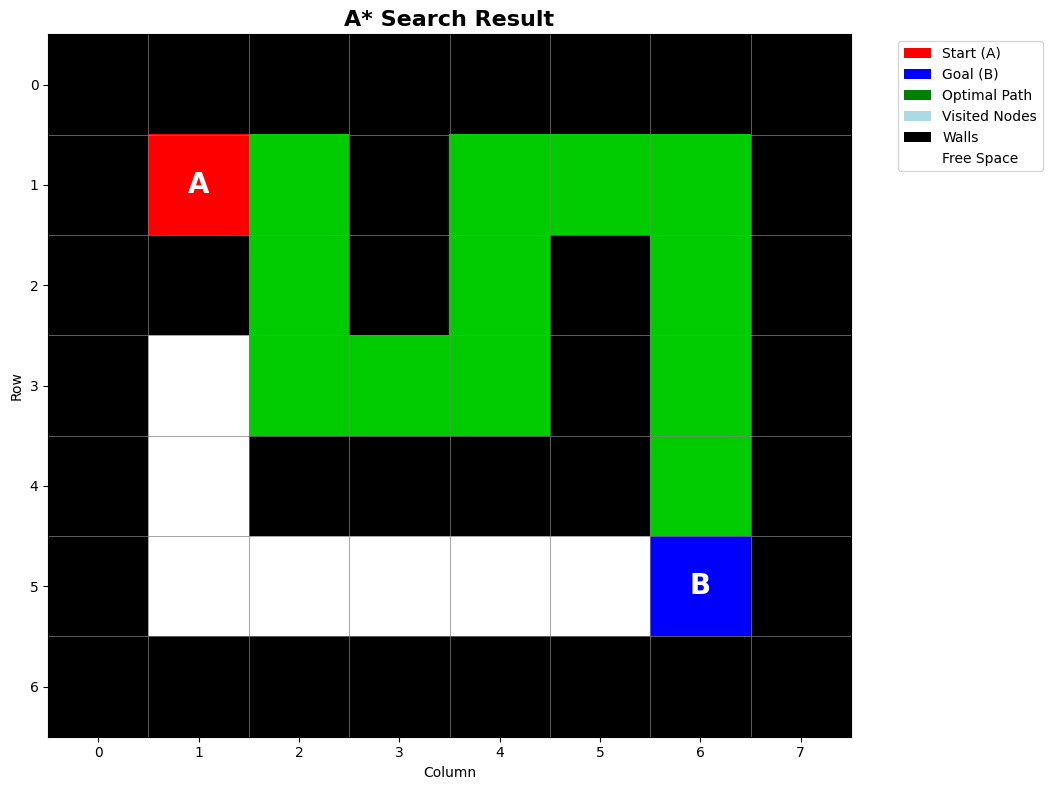


📋 SUMMARY COMPARISON
Original (Manhattan):     Cost=11, Visited=15, Optimal=YES
Case 1 (1.5× Manhattan):  Cost=11, Visited=15, Optimal=YES
Case 2 (Inconsistent):    Cost=13, Visited=14, Optimal=NO


In [4]:
# Add these functions after your existing functions

# CASE 1: Manhattan Distance × 1.5 (Non-admissible)
def heuristic_case1(pos1, pos2):
    """Case 1: Manhattan distance multiplied by 1.5"""
    return 1.5 * manhattan_distance(pos1, pos2)

# CASE 2: Inconsistent Heuristic
def heuristic_case2(pos1, pos2):
    """Case 2: Heuristic that violates consistency for one edge"""
    base_h = manhattan_distance(pos1, pos2)
    
    # Violate consistency at position (3,1) - adds extra cost
    if pos1 == (3, 1):
        return base_h + 3  # This creates inconsistency
    return base_h

# Modified A* to accept custom heuristic
def a_star_search_custom(maze, heuristic_func):
    """A* search with custom heuristic function"""
    start, goal = find_start_goal(maze)
    if not start or not goal:
        return None, [], float('inf')
    
    # Priority queue: (f_score, g_score, position)
    open_set = [(0, 0, start)]
    came_from = {}
    g_score = {start: 0}
    visited_order = []
    
    while open_set:
        current_f, current_g, current = heapq.heappop(open_set)
        
        # Skip if already processed
        if current in visited_order:
            continue
            
        visited_order.append(current)
        
        # Goal reached!
        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, visited_order, g_score[current]
        
        # Explore neighbors
        for neighbor in get_neighbors(current, maze):
            if neighbor in visited_order:
                continue
                
            tentative_g = g_score[current] + 1  # Each step costs 1
            
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                # Better path found
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                # Use custom heuristic here
                f_score = tentative_g + heuristic_func(neighbor, goal)
                heapq.heappush(open_set, (f_score, tentative_g, neighbor))
    
    return None, visited_order, float('inf')

# Function to test if heuristic is admissible
def test_admissible(maze, heuristic_func):
    """Check if heuristic is admissible by comparing with true distances"""
    start, goal = find_start_goal(maze)
    
    # Calculate true distances using BFS from goal
    true_distances = {}
    queue = [(goal, 0)]
    visited = {goal}
    
    while queue:
        pos, dist = queue.pop(0)
        true_distances[pos] = dist
        
        for neighbor in get_neighbors(pos, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, dist + 1))
    
    # Check admissibility
    violations = 0
    for pos, true_dist in true_distances.items():
        h_val = heuristic_func(pos, goal)
        if h_val > true_dist:
            violations += 1
            if violations <= 3:  # Show first 3 violations
                print(f"   Violation at {pos}: h={h_val:.1f} > true_dist={true_dist}")
    
    return violations == 0

# Run Cases 1 and 2
def run_cases():
    print("\n" + "="*50)
    print("CASE 1: Manhattan Distance × 1.5")
    print("="*50)
    
    # Test admissibility
    print("🧮 Testing Admissibility:")
    is_admissible1 = test_admissible(maze, heuristic_case1)
    print(f"   Result: {'ADMISSIBLE' if is_admissible1 else 'NOT ADMISSIBLE'}")
    
    # Run A* with Case 1
    path1, visited1, cost1 = a_star_search_custom(maze, heuristic_case1)
    
    if path1:
        print(f"\n📊 Case 1 Results:")
        print(f"   ✅ Path Found: {path1}")
        print(f"   💰 Cost: {cost1}")
        print(f"   📏 Path Length: {len(path1)} steps")
        print(f"   🔍 Nodes Visited: {len(visited1)}")
        print(f"   🏆 Optimal: {'YES' if cost1 == cost else 'NO'}")  # Compare with original
        
        # Visualize
        visualize_path(maze, path1, visited1)
    
    print("\n" + "="*50)
    print("CASE 2: Inconsistent Heuristic")
    print("="*50)
    
    # Test admissibility
    print("🧮 Testing Admissibility:")
    is_admissible2 = test_admissible(maze, heuristic_case2)
    print(f"   Result: {'ADMISSIBLE' if is_admissible2 else 'NOT ADMISSIBLE'}")
    
    # Run A* with Case 2
    path2, visited2, cost2 = a_star_search_custom(maze, heuristic_case2)
    
    if path2:
        print(f"\n📊 Case 2 Results:")
        print(f"   ✅ Path Found: {path2}")
        print(f"   💰 Cost: {cost2}")
        print(f"   📏 Path Length: {len(path2)} steps")
        print(f"   🔍 Nodes Visited: {len(visited2)}")
        print(f"   🏆 Optimal: {'YES' if cost2 == cost else 'NO'}")  # Compare with original
        
        # Visualize
        visualize_path(maze, path2, visited2)
    
    # Summary
    print("\n" + "="*50)
    print("📋 SUMMARY COMPARISON")
    print("="*50)
    print(f"Original (Manhattan):     Cost={cost}, Visited={len(visited)}, Optimal=YES")
    print(f"Case 1 (1.5× Manhattan):  Cost={cost1}, Visited={len(visited1)}, Optimal={'YES' if cost1==cost else 'NO'}")
    print(f"Case 2 (Inconsistent):    Cost={cost2}, Visited={len(visited2)}, Optimal={'YES' if cost2==cost else 'NO'}")

# Add this line at the very end of your code to run both cases
run_cases()

In [4]:
# Add these functions to your existing code

# CASE 1: Manhattan Distance × 1.5
def heuristic_case1(pos1, pos2):
    """Case 1: Manhattan distance multiplied by 1.5"""
    return 1.5 * manhattan_distance(pos1, pos2)

# CASE 2: Inconsistent Heuristic
def heuristic_case2(pos1, pos2):
    """Case 2: Inconsistent heuristic"""
    base_h = manhattan_distance(pos1, pos2)
    if pos1 == (3, 1):  # Create inconsistency at this position
        return base_h + 3
    return base_h

# Modified A* to use custom heuristic
def a_star_with_heuristic(maze, heuristic_func):
    """A* search with custom heuristic"""
    start, goal = find_start_goal(maze)
    if not start or not goal:
        return None, [], float('inf')
    
    open_set = [(0, 0, start)]
    came_from = {}
    g_score = {start: 0}
    visited_order = []
    
    while open_set:
        current_f, current_g, current = heapq.heappop(open_set)
        
        if current in visited_order:
            continue
            
        visited_order.append(current)
        
        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, visited_order, g_score[current]
        
        for neighbor in get_neighbors(current, maze):
            if neighbor in visited_order:
                continue
                
            tentative_g = g_score[current] + 1
            
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + heuristic_func(neighbor, goal)
                heapq.heappush(open_set, (f_score, tentative_g, neighbor))
    
    return None, visited_order, float('inf')

# Function to record and display results
def record_astar_results():
    """Record A* results for each case as required"""
    
    print("🎯 A* SEARCH RESULTS RECORDING")
    print("="*60)
    
    # Get optimal solution first (baseline)
    print("Getting optimal solution (baseline)...")
    optimal_path, optimal_visited, optimal_cost = a_star_search(maze)
    
    # Results storage
    results = {}
    
    # ORIGINAL CASE (Manhattan Distance)
    print("\n📋 ORIGINAL: Standard Manhattan Distance")
    print("-" * 40)
    
    results['original'] = {
        'path_found': optimal_path is not None,
        'path': optimal_path,
        'cost_of_path': optimal_cost,
        'path_is_optimal': True,  # This is our baseline
        'nodes_visited': len(optimal_visited)
    }
    
    if optimal_path:
        print(f"✅ Path Found: {optimal_path}")
        print(f"💰 Cost of Path: {optimal_cost}")
        print(f"🏆 Path is Optimal: YES (baseline)")
    else:
        print("❌ No path found")
    
    # CASE 1: Manhattan Distance × 1.5
    print("\n📋 CASE 1: Manhattan Distance × 1.5")
    print("-" * 40)
    
    path1, visited1, cost1 = a_star_with_heuristic(maze, heuristic_case1)
    
    results['case1'] = {
        'path_found': path1 is not None,
        'path': path1,
        'cost_of_path': cost1 if path1 else float('inf'),
        'path_is_optimal': (cost1 == optimal_cost) if path1 else False,
        'nodes_visited': len(visited1)
    }
    
    if path1:
        print(f"✅ Path Found: {path1}")
        print(f"💰 Cost of Path: {cost1}")
        print(f"🏆 Path is Optimal: {'YES' if cost1 == optimal_cost else 'NO'}")
    else:
        print("❌ No path found")
        print(f"💰 Cost of Path: ∞")
        print(f"🏆 Path is Optimal: NO")
    
    # CASE 2: Inconsistent Heuristic
    print("\n📋 CASE 2: Inconsistent Heuristic")
    print("-" * 40)
    
    path2, visited2, cost2 = a_star_with_heuristic(maze, heuristic_case2)
    
    results['case2'] = {
        'path_found': path2 is not None,
        'path': path2,
        'cost_of_path': cost2 if path2 else float('inf'),
        'path_is_optimal': (cost2 == optimal_cost) if path2 else False,
        'nodes_visited': len(visited2)
    }
    
    if path2:
        print(f"✅ Path Found: {path2}")
        print(f"💰 Cost of Path: {cost2}")
        print(f"🏆 Path is Optimal: {'YES' if cost2 == optimal_cost else 'NO'}")
    else:
        print("❌ No path found")
        print(f"💰 Cost of Path: ∞")
        print(f"🏆 Path is Optimal: NO")
    
    # SUMMARY TABLE
    print("\n" + "="*60)
    print("📊 FINAL RESULTS SUMMARY")
    print("="*60)
    print(f"{'Case':<25} {'Path Found':<12} {'Cost':<8} {'Optimal':<10}")
    print("-" * 55)
    
    for case_name, data in results.items():
        case_display = {
            'original': 'Original (Manhattan)',
            'case1': 'Case 1 (1.5× Manhattan)', 
            'case2': 'Case 2 (Inconsistent)'
        }[case_name]
        
        path_found = "✅ YES" if data['path_found'] else "❌ NO"
        cost = str(data['cost_of_path']) if data['cost_of_path'] != float('inf') else "∞"
        optimal = "✅ YES" if data['path_is_optimal'] else "❌ NO"
        
        print(f"{case_display:<25} {path_found:<12} {cost:<8} {optimal:<10}")
    
    # DETAILED RESULTS FOR COPYING
    print("\n" + "="*60)
    print("📋 DETAILED RESULTS (For Your Report)")
    print("="*60)
    
    for case_name, data in results.items():
        case_display = {
            'original': 'Original Manhattan Distance',
            'case1': 'Case 1: Manhattan Distance × 1.5', 
            'case2': 'Case 2: Inconsistent Heuristic'
        }[case_name]
        
        print(f"\n{case_display}:")
        print(f"  • Path Found: {'Yes' if data['path_found'] else 'No'}")
        if data['path_found']:
            print(f"  • Path: {data['path']}")
        print(f"  • Cost of Path: {data['cost_of_path']}")
        print(f"  • Path is Optimal: {'Yes' if data['path_is_optimal'] else 'No'}")
        print(f"  • Nodes Visited: {data['nodes_visited']}")
    
    return results

# Add this at the end of your code to run the recording
record_astar_results()

🎯 A* SEARCH RESULTS RECORDING
Getting optimal solution (baseline)...

📋 ORIGINAL: Standard Manhattan Distance
----------------------------------------
✅ Path Found: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
💰 Cost of Path: 11
🏆 Path is Optimal: YES (baseline)

📋 CASE 1: Manhattan Distance × 1.5
----------------------------------------
✅ Path Found: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
💰 Cost of Path: 11
🏆 Path is Optimal: YES

📋 CASE 2: Inconsistent Heuristic
----------------------------------------
✅ Path Found: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]
💰 Cost of Path: 13
🏆 Path is Optimal: NO

📊 FINAL RESULTS SUMMARY
Case                      Path Found   Cost     Optimal   
-------------------------------------------------------
Original (Manhattan)      ✅ YES        11       ✅ YES     
Case 1 (1.5× 

{'original': {'path_found': True,
  'path': [(1, 1),
   (1, 2),
   (2, 2),
   (3, 2),
   (3, 1),
   (4, 1),
   (5, 1),
   (5, 2),
   (5, 3),
   (5, 4),
   (5, 5),
   (5, 6)],
  'cost_of_path': 11,
  'path_is_optimal': True,
  'nodes_visited': 15},
 'case1': {'path_found': True,
  'path': [(1, 1),
   (1, 2),
   (2, 2),
   (3, 2),
   (3, 1),
   (4, 1),
   (5, 1),
   (5, 2),
   (5, 3),
   (5, 4),
   (5, 5),
   (5, 6)],
  'cost_of_path': 11,
  'path_is_optimal': True,
  'nodes_visited': 15},
 'case2': {'path_found': True,
  'path': [(1, 1),
   (1, 2),
   (2, 2),
   (3, 2),
   (3, 3),
   (3, 4),
   (2, 4),
   (1, 4),
   (1, 5),
   (1, 6),
   (2, 6),
   (3, 6),
   (4, 6),
   (5, 6)],
  'cost_of_path': 13,
  'path_is_optimal': False,
  'nodes_visited': 14}}